In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf


In [3]:
size = 256
img_data = tf.keras.preprocessing.image.load_img('Bill_Gates.jpg', target_size= (size, size))
img_data_arr = tf.keras.preprocessing.image.img_to_array(img_data)

img_array = img_data_arr.astype('float32') / 255.

# expand dim
np_img = np.expand_dims(img_array, axis= 0)
np_img.shape

(1, 256, 256, 3)

In [10]:

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(size, size, 3)))
model.add(tf.keras.layers.MaxPooling2D((2, 2), padding='same'))
model.add(tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPooling2D((2, 2), padding='same'))
model.add(tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPooling2D((2, 2), padding='same')) #Latent Space
#Dense Layer
#=========================================Dont Get Confused
#Dense Layer
model.add(tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.UpSampling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.UpSampling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.UpSampling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')) #Regenerated Image



In [11]:
# model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
model.compile(optimizer='adam', loss='mae', metrics=['mae'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 128, 128, 8)    │         2,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 64, 64, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 64, 64, 8)      │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 32, 32, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 32, 32, 8)      │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_3 (UpSampling2D)  │ (None, 64, 64, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 64, 64, 8)      │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_4 (UpSampling2D)  │ (None, 128, 128, 8)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 128, 128, 32)   │         2,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_5 (UpSampling2D)  │ (None, 256, 256, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 256, 256, 3)    │           867 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,163 (31.89 KB)

 Trainable params: 8,163 (31.89 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# eager running of functions:
tf.config.experimental_run_functions_eagerly(True)

Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.


In [8]:
model.fit(np_img, np_img, epochs=5000, shuffle=True)

Epoch 1/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 619ms/step - accuracy: 0.8890 - loss: 0.0638
Epoch 2/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step - accuracy: 0.8891 - loss: 0.0585
Epoch 3/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 532ms/step - accuracy: 0.8890 - loss: 0.0559
Epoch 4/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step - accuracy: 0.8884 - loss: 0.0545
Epoch 5/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step - accuracy: 0.8860 - loss: 0.0522
Epoch 6/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - accuracy: 0.8743 - loss: 0.0490
Epoch 7/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step - accuracy: 0.8438 - loss: 0.0466
Epoch 8/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step - accuracy: 0.7695 - loss: 0.0462
Epoch 9/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step - accuracy: 0.4870 - loss: 0.0472
Epoch 10/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step - accuracy: 0.1852 - loss: 0.0480
Epoch 11/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 554ms/step - accuracy: 0.1398 - loss: 0.0478
Epoch 12/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.1027403].


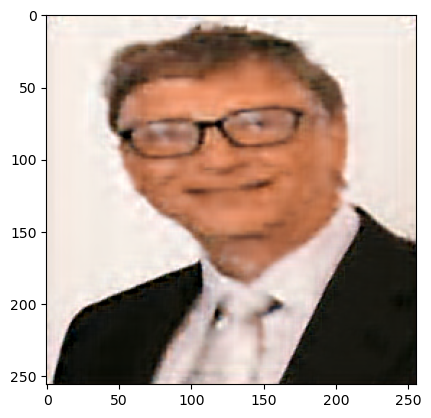

In [9]:
prediction = model.predict(np_img)

# Result:
import matplotlib.pyplot as plt

plt.imshow(prediction[0].reshape(size,size,3), cmap='gray')